In [1]:
# !pip install sentencepiece
# !pip install tensorflow_text


In [2]:
#importing all the necessary Librarires.
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text 
import tensorflow_datasets as tfds
#for plotting accuracy Later
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#Pretrained model on English language using a masked language modeling (MLM) objective

In [4]:
#using the pretrained model
albert_url='https://tfhub.dev/tensorflow/albert_en_base/2'
encoder = hub.KerasLayer(albert_url)
preprocessor_url="https://tfhub.dev/tensorflow/albert_en_preprocess/3"
preprocessor = hub.KerasLayer(preprocessor_url)
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
encoder_inputs = preprocessor(text_input)


In [6]:
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]     
sequence_output = outputs["sequence_output"]
pooled_output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

In [7]:
#Importing, splitting IMDB Reviews
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteKDBZLF/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteKDBZLF/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteKDBZLF/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [9]:
#Transfer Learning, using pretrained model
embedding_model = tf.keras.Model(text_input, pooled_output)
#using sequential model with keras.
model = tf.keras.Sequential()
model.add(embedding_model)
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
#training the model
history = model.fit(train_data.shuffle(10000).batch(128),
                    epochs=10,
                    validation_data=validation_data.batch(128),
                    verbose=1)

Epoch 1/10
118/118 [==============================] - 328s 3s/step - loss: 0.5813 - accuracy: 0.6718 - val_loss: 0.5850 - val_accuracy: 0.6291
Epoch 2/10
118/118 [==============================] - 322s 3s/step - loss: 0.5043 - accuracy: 0.7387 - val_loss: 0.5396 - val_accuracy: 0.7088
Epoch 3/10
118/118 [==============================] - 322s 3s/step - loss: 0.4898 - accuracy: 0.7509 - val_loss: 0.6108 - val_accuracy: 0.6161
Epoch 4/10
118/118 [==============================] - 322s 3s/step - loss: 0.4769 - accuracy: 0.7615 - val_loss: 0.4933 - val_accuracy: 0.7376
Epoch 5/10
118/118 [==============================] - 322s 3s/step - loss: 0.4728 - accuracy: 0.7630 - val_loss: 0.5916 - val_accuracy: 0.6570
Epoch 6/10
118/118 [==============================] - 322s 3s/step - loss: 0.4676 - accuracy: 0.7671 - val_loss: 0.6662 - val_accuracy: 0.6182
Epoch 7/10
118/118 [==============================] - 322s 3s/step - loss: 0.4616 - accuracy: 0.7713 - val_loss: 0.4803 - val_accuracy: 0.7497

<Figure size 432x288 with 0 Axes>

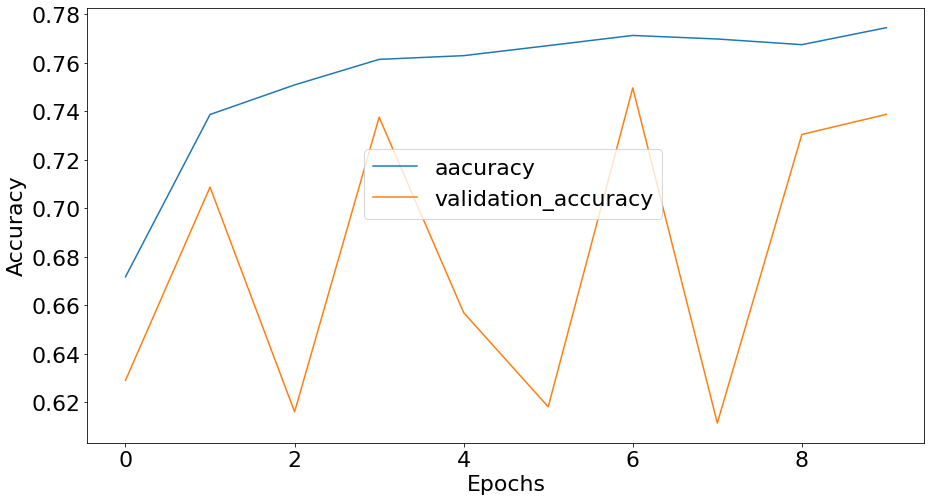

In [11]:
#plotting the accuracy
font = {'family' : 'normal',
        'size'   : 22}
plt.tight_layout()
matplotlib.rc('font', **font)
plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'],label='aacuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend(bbox_to_anchor=(0.7, 0.7))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('foo1.png')
plt.show()